#   FIT1043 Assignment 1
####  Rui Qin 30874157

##  Libraries

In [2]:
# Data analysis
import pandas as pd
import numpy as np
from scipy.stats import iqr

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
#pip install missingno
import missingno

## Import data

In [3]:
# Windows environment

df= pd.read_csv("C:/Users/aud/My Drive/Documents/Collection/2-SEM_2/FIT1043/Assignment 1 ()/monthly_smartcard_replacements.csv")

# MacOs environment

#df= pd.read_csv("/Users/mac/My Drive/Documents/Collection/2-SEM_2/FIT1043/Assignment 1 ()/monthly_smartcard_replacements.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/aud/My Drive/Documents/Collection/2-SEM_2/FIT1043/Assignment 1 ()/monthly_smartcard_replacements.csv'

## Task A: Data Exploration and Auditing

### A1. Dataset size

In [ ]:
# Using shape to show the dataset column and row information

df.shape

(5792, 5)

There are _**5 columns and 5792 rows**_ in this data frame

### A2. Missing values in the dataset

<AxesSubplot:>

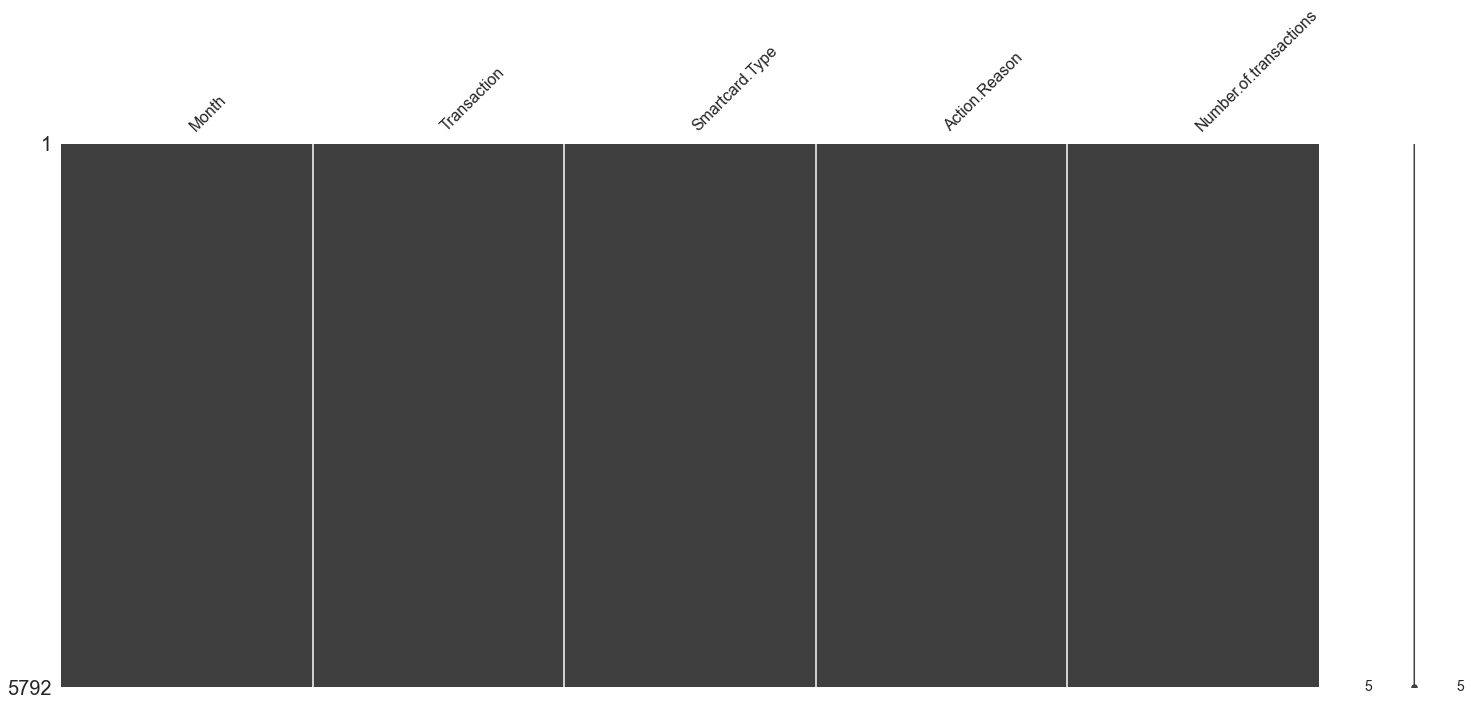

In [ ]:
# Using missingno to present the data integrity

missingno.matrix(df)

In [ ]:
# Calculate the sum of missing data

df.isna().sum()

Month                     0
Transaction               0
Smartcard.Type            0
Action.Reason             0
Number.of.transactions    0
dtype: int64

All the columns are full filled, and there are _**no missing data**_

In [ ]:
df[df.duplicated(keep=False)]

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions


### A3. Data Types

In [ ]:
df.dtypes

Month                     object
Transaction               object
Smartcard.Type            object
Action.Reason             object
Number.of.transactions     int64
dtype: object

Month, Transaction, Smartcard.Type, Action.Reason are object, Number.of.transactions is integer

### A4. Convert Data Type

In [ ]:
# Using pd.to_datetime() to convert Month data type

df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

Month                     datetime64[ns]
Transaction                       object
Smartcard.Type                    object
Action.Reason                     object
Number.of.transactions             int64
dtype: object

Using pd.to_datetime, we successfully convert Month from object to DateTime

### A5. Descriptive Statistics

In [ ]:
df['Number.of.transactions'].describe()

count    5792.000000
mean      303.241540
std       845.056684
min         1.000000
25%         5.000000
50%        18.000000
75%        84.000000
max      9097.000000
Name: Number.of.transactions, dtype: float64

In [ ]:
# Calculate the mode of dataset

df['Number.of.transactions'].mode()

0    1
Name: Number.of.transactions, dtype: int64

In [ ]:
# Calculate the outliers range base on IQR method

np.percentile(df['Number.of.transactions'], 75) + 1.5*iqr(df['Number.of.transactions'])

202.5

- The number of transactions has an average of 303.24 times
- The data is _**highly spread**_ (indicated by range: 9096 and STD: 845.056)
- Large difference between mean and median based on Q2, which means there are _**outliers inside the data, the outliers range is the data which larger than 202.5**_
- The mean is much larger than the median and with the help of the mode, _**the whole data distribution is positively skewed**_

### A6. Exploring Smartcard Types

####    A.6.1

In [ ]:
df['Smartcard.Type'].unique()

array(['Photo Identification Card', 'Driver Licence Card',
       'Industry Authority Card', 'Marine Licence Ind Card'], dtype=object)

There are _**4 different types**_ of smart cards

In [ ]:
# Show how many instances were recorded for each type

instanceRecorded = df.groupby(['Smartcard.Type'])['Number.of.transactions'].count()
instanceRecorded

Smartcard.Type
Driver Licence Card          1896
Industry Authority Card      1218
Marine Licence Ind Card      1047
Photo Identification Card    1631
Name: Number.of.transactions, dtype: int64

Driver Licence Card and Photo Identification Card are highly used in smart card

####    A.6.2

In [ ]:
#Using pd.Series() to get the number of Driver Licence Card and calculate the percentage

pd.Series(data=instanceRecorded, index=['Driver Licence Card'])/len(df)*100

Driver Licence Card    32.734807
Name: Number.of.transactions, dtype: float64

The Driver Licence Card percentage is _**32.73%**_

### A7. Exploring Reasons for Smartcard Replacement

####    A.7.1

In [ ]:
# Show unique of describing to know how many unique reasons

df['Action.Reason'].describe()

count     5792
unique      20
top       Lost
freq       539
Name: Action.Reason, dtype: object

There are _**20 unique different reasons**_ for smart card replacements


In [ ]:
# Using group by and count to know instances in each reason

df.groupby(['Action.Reason'])['Number.of.transactions'].count()

Action.Reason
Change Customer Details                    521
Condition Change                           364
Court Order Issued X3 Or X4 Condition      137
Da/dgd Smartcard Replacement Fee Exempt    134
Damaged                                    342
Defective                                   88
Destroyed                                  379
Disaster Relief                             48
Expired                                    133
Facial Image Is Not A True Likeness        304
Faulty                                     344
Lost                                       539
Lost In Mail - Imu                         519
Managers Approval                          532
Marine Licence Transition                  132
Merged                                     200
Product Exists Othr Surrend Void Cancel    321
Remove Gender From Smartcard                28
Stolen                                     471
Transition Laminate To Smartcard           256
Name: Number.of.transactions, dtype: int64

The upper list shows how much instances in each reason

####    A.7.2

In [ ]:
# New data frame which only contains Lost and number of transactions over 100

df1 = df[(df["Action.Reason"] == 'Lost') & (df["Number.of.transactions"] >= 100)]

# Using group by and count to calculate transactions in a month, and using count again to count how many unique months

df1.groupby('Month')['Month'].count().count()

133

There are total _**133**_ months which 100 or more smart card replacements are reported due to being lost

## Task B: Group Level Analysis and Visualisation

### B1. Investigating Annual Smartcard Replacements

#### B.1.1

In [ ]:
# Prepare a copy of df

df2 = df.copy(deep=True)

In [ ]:
# Add new column called 'Year' into the data frame

df2['Year']=df2['Month'].dt.year
df2

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156,2019
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110,2019
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48,2019
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8,2019
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7,2019
...,...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1,2020
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2020
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2021
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1,2021


#### B.1.2

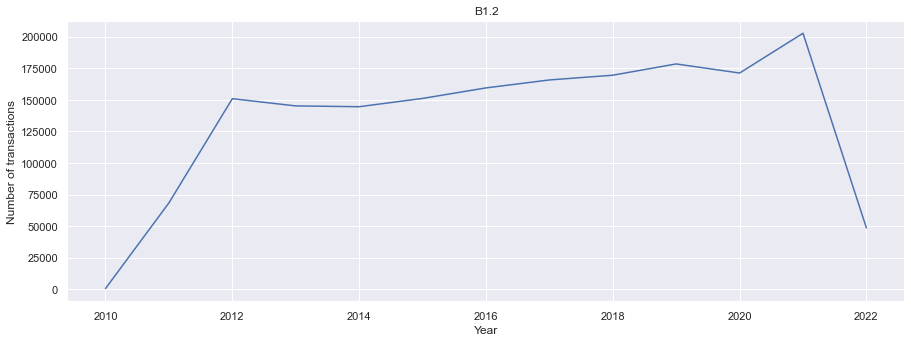

In [ ]:
#Setting a filter, sum the number of transactions

fun = {'Number.of.transactions':'sum'}

# Setting the size of graph

plt.figure(figsize = (15,5))

# Data frame group by year and counting the number of transactions

plt.plot(df2.groupby('Year').agg(fun))

# Setting title, and name the x axis and y axis

plt.title("B1.2")
plt.xlabel('Year')
plt.ylabel('Number of transactions')
plt.subplots_adjust(bottom=0.1)

#### B.1.3


`Trend Analysis`

As can be seen from the chart, the number of transactions increased a lot from less than 100 to more than 500 from 2010 to 2012. From 2012 to 2020, the data fluctuated around 500, but after 2020, the number of transactions suddenly began to decrease sharply, and by 2022, the number dropped to between 100 and 200.

`Special Year and Reason`

We can notice there are two-year act special. The first one is 2010, this may cause by the penetration of smart cards being low, but with the development of technology, the usage of smart cards goes up. The second period is 2022, this may people blind their smart card on the phone, so they no need to go out with the card anymore.


### B2. Investigating Reasons for Smartcard Replacement

#### B.2.1

Text(0, 0.5, 'Number of transactions')

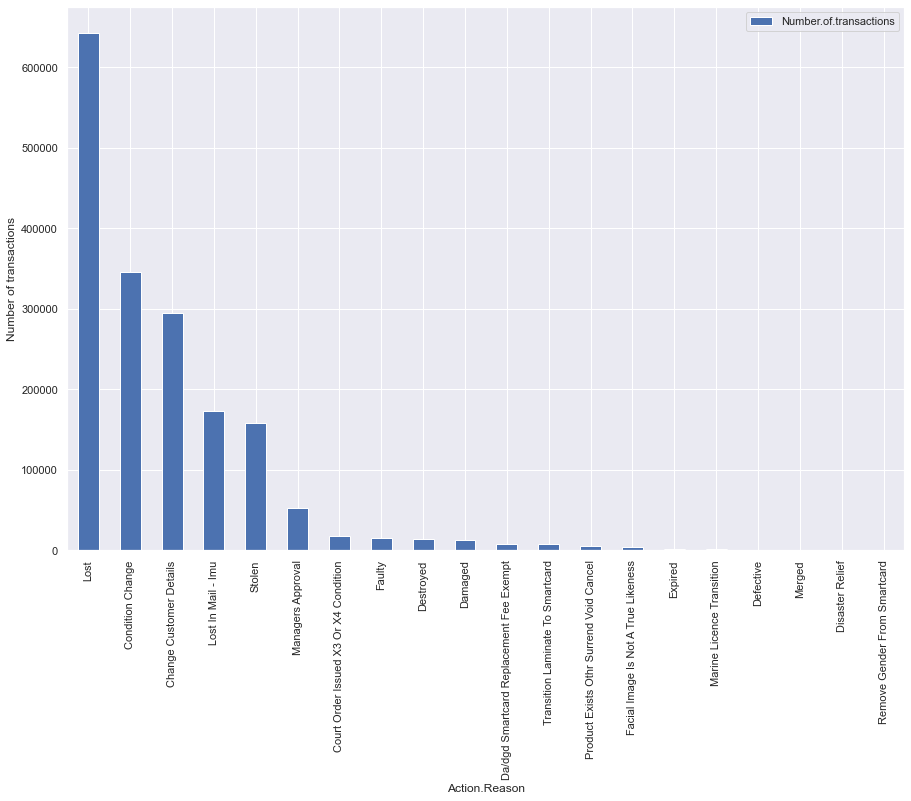

In [ ]:
# Using sort_values to set the data from large to small

df2.groupby('Action.Reason').agg(fun).sort_values(by = 'Number.of.transactions',
                                                  ascending = False).plot.bar(figsize=(15,10))
plt.ylabel('Number of transactions')

#### B.2.2

The top 3 reasons of replacement is _**Lost, condition change and change customer details**_.

#### B.2.3

In [ ]:
# Using aggregate function we create to create new data frame, and reset the column names

df3 = df2.groupby('Action.Reason').agg(fun).reset_index()

# Setting the filter and get the final result

df3 = df3[(df3["Number.of.transactions"] <= 2000) & (df3["Number.of.transactions"] >= 1000)]
df3

,Action.Reason,Number.of.transactions
14,Marine Licence Transition,1822


Only _**Marine License Transition**_ has total number of transactions between 1000 and 2000.

### B3. Investigating Reasons over Annual Smartcard Replacement

#### B.3.1

In [ ]:
# Data grouped by reason and year, each reason and year calculate the sum of number of transactions

df4 = df2.groupby(['Action.Reason','Year']).agg(fun).reset_index()

# Print table

df4

,Action.Reason,Year,Number.of.transactions
0,Change Customer Details,2010,84
1,Change Customer Details,2011,12265
2,Change Customer Details,2012,28446
3,Change Customer Details,2013,28603
4,Change Customer Details,2014,28188
...,...,...,...
231,Transition Laminate To Smartcard,2018,410
232,Transition Laminate To Smartcard,2019,453
233,Transition Laminate To Smartcard,2020,576
234,Transition Laminate To Smartcard,2021,738


#### B.3.2

In [ ]:
# Using the filter to get the data which number of transactions over 10000

df4[(df4["Number.of.transactions"] > 10000)]

,Action.Reason,Year,Number.of.transactions
1,Change Customer Details,2011,12265
2,Change Customer Details,2012,28446
3,Change Customer Details,2013,28603
4,Change Customer Details,2014,28188
5,Change Customer Details,2015,28267
6,Change Customer Details,2016,27730
7,Change Customer Details,2017,26837
8,Change Customer Details,2018,27083
9,Change Customer Details,2019,26856
10,Change Customer Details,2020,24934


#### B.3.3

_**Change Customer Details, Stolen, Lost, Lost in mail, Condition Change**_ have at least one year with the number of annual
transactions exceeding 10000 (Indicate by the list).

#### B.3.4

In this part, we are going to set the graph in four different group.

`Positive skewed group`

##### barplot analysis

Text(0.5, 1.0, 'Transition Laminate To Smartcard')

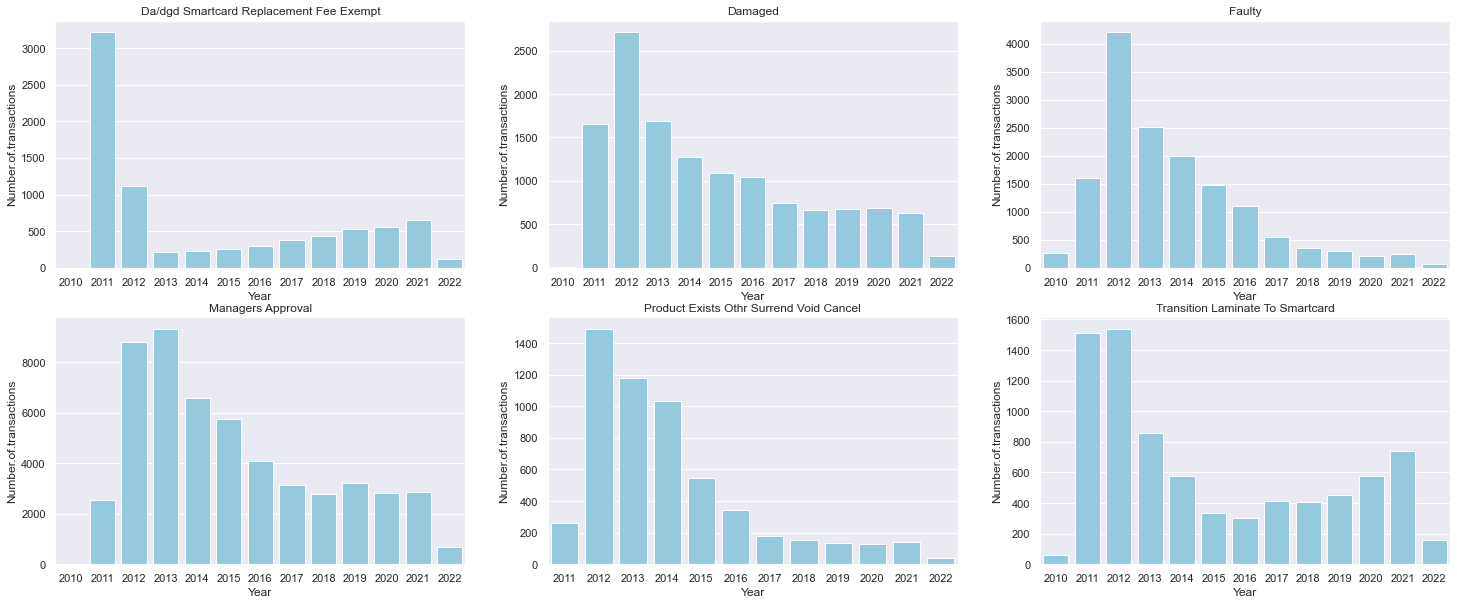

In [ ]:
#### Positive skewed ####

# Set a grey background

sns.set(style="darkgrid")

# Set up figure

fig, axs = plt.subplots(2,3, figsize=(25,10))

# Draw graph

# Da/dgd Smartcard Replacement Fee Exempt
sns.barplot(data=df4[df4["Action.Reason"]=='Da/dgd Smartcard Replacement Fee Exempt'],
            x="Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[0,0]).set_title("Da/dgd Smartcard Replacement Fee Exempt")

# Damaged
sns.barplot(data=df4[df4["Action.Reason"]=='Damaged'],
            x="Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[0,1]).set_title("Damaged")

# Faulty
sns.barplot(data=df4[df4["Action.Reason"]=='Faulty'],
            x="Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[0, 2]).set_title("Faulty")

# Managers Approval
sns.barplot(data=df4[df4["Action.Reason"]=='Managers Approval'],
            x="Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[1, 0]).set_title("Managers Approval")

# Product Exists Othr Surrend Void Cancel
sns.barplot(data=df4[df4["Action.Reason"]=='Product Exists Othr Surrend Void Cancel'],
            x="Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[1,1]).set_title("Product Exists Othr Surrend Void Cancel")

# Transition Laminate To Smartcard
sns.barplot(data=df4[df4["Action.Reason"]=='Transition Laminate To Smartcard'],
            x="Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[1,2]).set_title("Transition Laminate To Smartcard")

- _**Transition Laminate To Smartcard and Managers Approval**_ are **positive skewed bimodal distribution**
    - This suggests that the number of smart card replacements, after experiencing a decline (2012 - 2013), the trend later went up in the period (2018 - 2021).
<br>
- _**The rest of the reason data**_ perform **positive skewed distribution**
    - This means after experiencing a short peak of replacement, the number of replacements shrinks.
    - This may be caused by people replacing the normal cards with smart cards, after they receive the smart cards they no longer replace the cards for these reasons.
    - E.g. New card after manager approval / Faulty solve after smart card technology is more mature.

##### Histogram analysis with barplot

Text(0.5, 1.0, 'Transition Laminate To Smartcard')

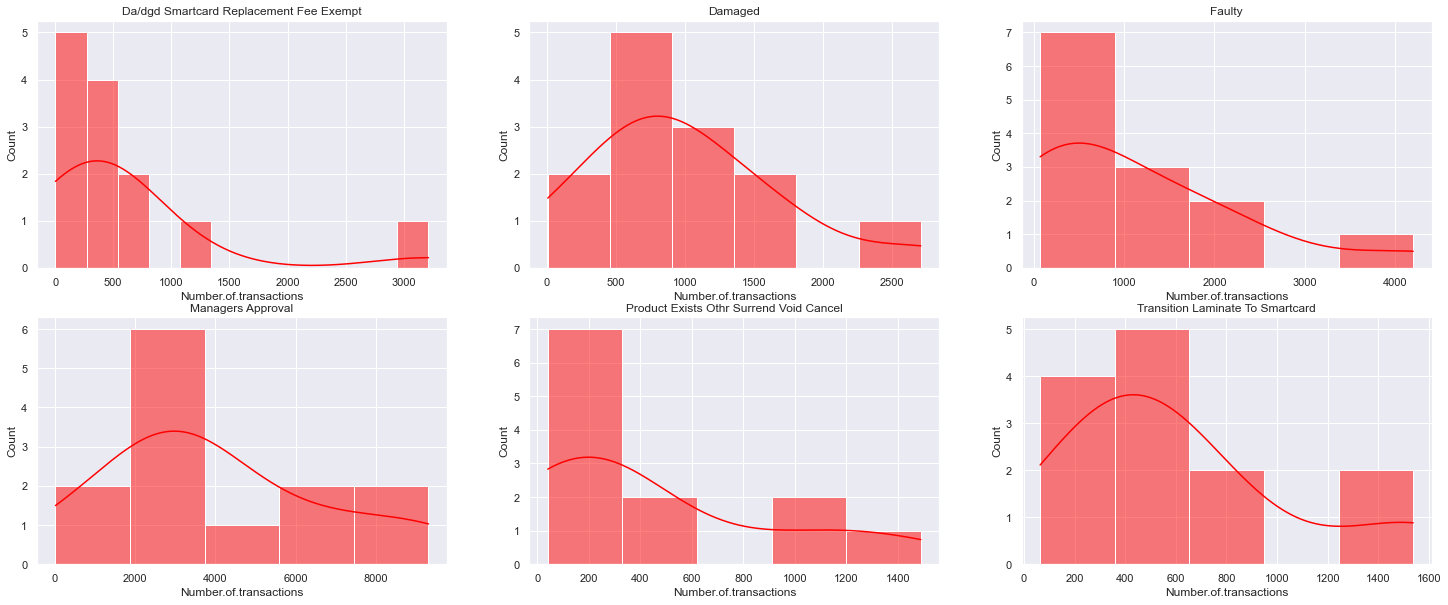

In [ ]:
#### Positive skewed ####

# Set a grey background

sns.set(style="darkgrid")

# Set up figure

fig, axs = plt.subplots(2,3, figsize=(25,10))

# Draw graph

# Da/dgd Smartcard Replacement Fee Exempt
sns.histplot(data=df4[df4["Action.Reason"]=='Da/dgd Smartcard Replacement Fee Exempt'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[0,0]).set_title("Da/dgd Smartcard Replacement Fee Exempt")

# Damaged
sns.histplot(data=df4[df4["Action.Reason"]=='Damaged'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[0,1]).set_title("Damaged")

# Faulty
sns.histplot(data=df4[df4["Action.Reason"]=='Faulty'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[0, 2]).set_title("Faulty")

# Managers Approval
sns.histplot(data=df4[df4["Action.Reason"]=='Managers Approval'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[1, 0]).set_title("Managers Approval")

# Product Exists Othr Surrend Void Cancel
sns.histplot(data=df4[df4["Action.Reason"]=='Product Exists Othr Surrend Void Cancel'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[1,1]).set_title("Product Exists Othr Surrend Void Cancel")

# Transition Laminate To Smartcard
sns.histplot(data=df4[df4["Action.Reason"]=='Transition Laminate To Smartcard'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[1,2]).set_title("Transition Laminate To Smartcard")

- **Da/dgd Smartcard Replacement Fee Exempt, Damaged, Transition Laminate To Smartcard and faulty**, most data clustered between 0 and 1000 has a high frequency. **Da/dgd Smartcard Replacement Fee Exempt** and **Transition Laminate** To Smartcard mainly concentrates on 2013-2022, whereas **Damaged and Faulty** concentrates on 2017-2022. **Managers Approval** has the highest data, with the 2000-4000 range having 6 counts and the 6000-8000 range having 4,

- **Product Exists Other Surrend Void Cancel** has fewer number of transactions frequency, mostly clustered around 0-300.

`Negative skewed group`


Text(0.5, 1.0, 'Merged')

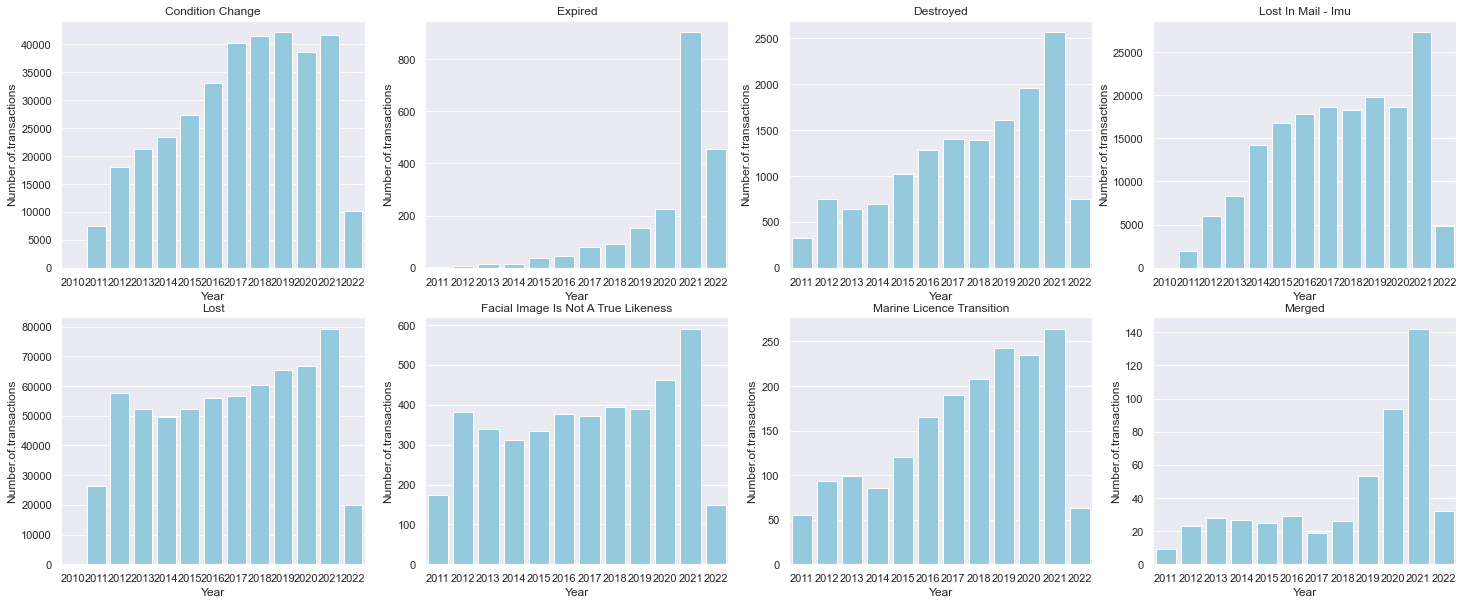

In [ ]:
#### Negative skewed ####

# Set a grey background

sns.set(style="darkgrid")

# Set up figure

fig, axs = plt.subplots(2,4, figsize=(25,10))

# Draw graph

# Condition Change
sns.barplot(data=df4[df4["Action.Reason"]=='Condition Change'],
            x="Year",
            y =  'Number.of.transactions',
            color="skyblue",
            ax=axs[0, 0]).set_title("Condition Change")

# Expired
sns.barplot(data=df4[df4["Action.Reason"]=='Expired'],
            x="Year",
            y =  'Number.of.transactions',
            color="skyblue",
            ax=axs[0,1]).set_title("Expired")

# Destroyed
sns.barplot(data=df4[df4["Action.Reason"]=='Destroyed'],
            x="Year",
            y =  'Number.of.transactions',
            color="skyblue",
            ax=axs[0,2]).set_title("Destroyed")

# Lost In Mail - Imu
sns.barplot(data=df4[df4["Action.Reason"]=='Lost In Mail - Imu'],
            x="Year",
            y =  'Number.of.transactions',
            color="skyblue",
            ax=axs[0,3]).set_title("Lost In Mail - Imu")

# Lost
sns.barplot(data=df4[df4["Action.Reason"]=='Lost'],
            x="Year",
            y =  'Number.of.transactions',
            color="skyblue",
            ax=axs[1,0]).set_title("Lost")

# Facial Image Is Not A True Likeness
sns.barplot(data=df4[df4["Action.Reason"]=='Facial Image Is Not A True Likeness'],
            x="Year",
            y =  'Number.of.transactions',
            color="skyblue",
            ax=axs[1, 1]).set_title("Facial Image Is Not A True Likeness")

# Marine Licence Transition
sns.barplot(data=df4[df4["Action.Reason"]=='Marine Licence Transition'],
            x="Year",
            y =  'Number.of.transactions',
            color="skyblue",
            ax=axs[1,2]).set_title("Marine Licence Transition")

# Merged
sns.barplot(data=df4[df4["Action.Reason"]=='Merged'],
            x="Year",
            y =  'Number.of.transactions',
            color="skyblue",
            ax=axs[1,3]).set_title("Merged")

- _**Lost and Facial Image Is Not A True Likeness**_ are **negative skewed bimodal distribution**
    - This suggests that the number of smart card replacements, after experiencing a small peak (2012 - 2013), the trend later went up and reach a higher peak (2018 - 2021).
    - Reason Lost may perform uniform distribution if the time long enough, this is because after the smart card replacement service started, the cases of lost card replacement already reach a high place in a short period. The lost card replacement will always stay in a high value.
    - If the Facial Image Is Not A True Likeness index drops in 2022, that means the reason index may be reaching a high value once every 10 years.
<br>
- _**The rest of the reason data**_ perform **negative skewed distribution**
    - This means the index peak at the tail of the data (2018 - 2022). This caused by people replacing little number of smart cards , after a period they start replacing their card and the index goes up
    - If the Expired index drops in 2022, that means the smart cards may expire every 10 years
    - The index of Lost In Mail is large, manufacturers need to take care to enforce the level of security in smart cards

##### Histogram analysis with barplot

Text(0.5, 1.0, 'Merged')

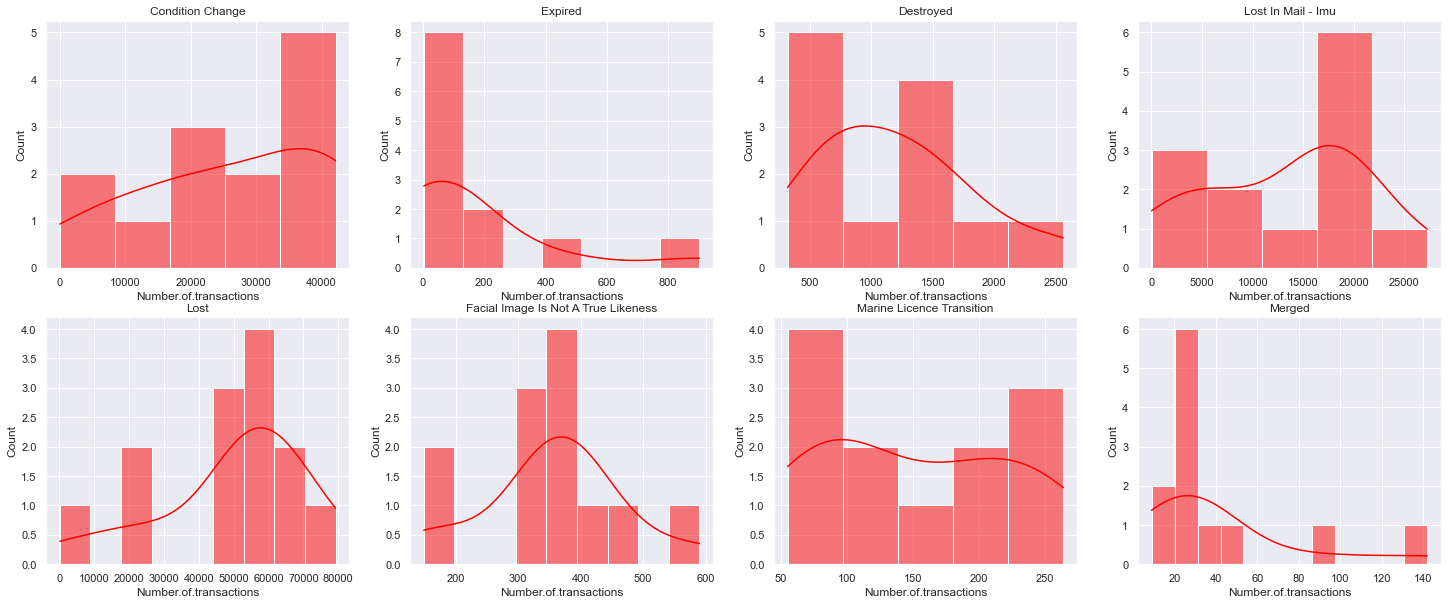

In [ ]:
#### Negative skewed ####

# Set a grey background

sns.set(style="darkgrid")

# Set up figure

fig, axs = plt.subplots(2,4, figsize=(25,10))

# Draw graph

# Condition Change
sns.histplot(data=df4[df4["Action.Reason"]=='Condition Change'],
            x =  'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[0, 0]).set_title("Condition Change")

# Expired
sns.histplot(data=df4[df4["Action.Reason"]=='Expired'],
            x =  'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[0,1]).set_title("Expired")

# Destroyed
sns.histplot(data=df4[df4["Action.Reason"]=='Destroyed'],
            x =  'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[0,2]).set_title("Destroyed")

# Lost In Mail - Imu
sns.histplot(data=df4[df4["Action.Reason"]=='Lost In Mail - Imu'],
            x =  'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[0,3]).set_title("Lost In Mail - Imu")

# Lost
sns.histplot(data=df4[df4["Action.Reason"]=='Lost'],
            x =  'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[1,0]).set_title("Lost")

# Facial Image Is Not A True Likeness
sns.histplot(data=df4[df4["Action.Reason"]=='Facial Image Is Not A True Likeness'],
            x =  'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[1, 1]).set_title("Facial Image Is Not A True Likeness")

# Marine Licence Transition
sns.histplot(data=df4[df4["Action.Reason"]=='Marine Licence Transition'],
            x =  'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[1,2]).set_title("Marine Licence Transition")

# Merged
sns.histplot(data=df4[df4["Action.Reason"]=='Merged'],
            x =  'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[1,3]).set_title("Merged")

- **Lost, Condition Change, and Lost In Mail - Imu** has an index of over 10000. The index of **lost** is usually concentrated in 50000-80000, while that of **Lost In Mail - Imu** is concentrated in 15,000-20,000. The highest value of **Condition Change** is between 30000 and 40000, and the rest are not low either. 
- The range of the number of transactions is low in **Facial Image Is Not A True Likeness** (200 - 600) and Expired (200 - 800), the data of **Facial Image Is Not A True Likeness** are clustered between 300 and 400, and the data of Expired is highly clustered between 0 - 200.
- **Merged** has most data clustered between 20-30 from 2011 to 2018.

`Uniform Distribution and a Positive Skewed Distribution`

Text(0.5, 1.0, 'Court Order Issued X3 Or X4 Condition')

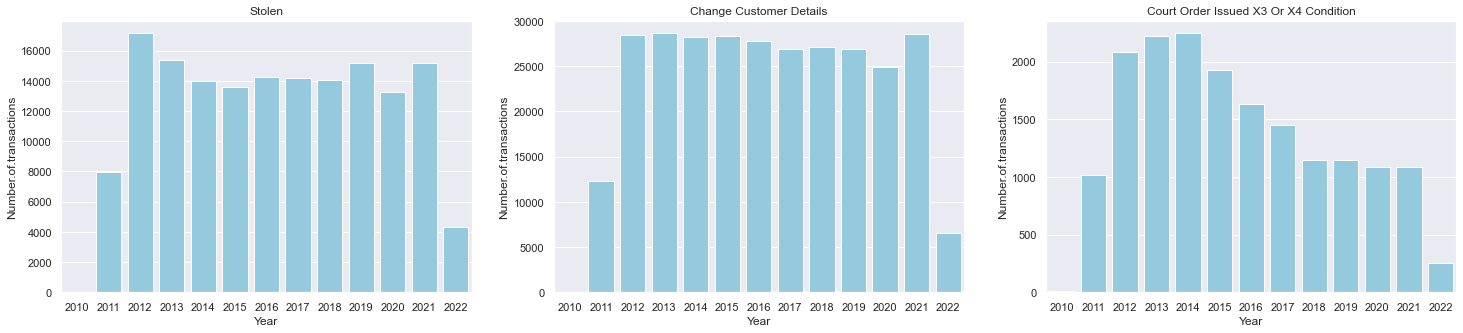

In [ ]:
#### Uniform Distribution and a Positive Skewed Distribution ####

# Set a grey background

sns.set(style="darkgrid")

# Set up figure

fig, axs = plt.subplots(1,3, figsize=(25,5))

# Draw graph

# Stolen
sns.barplot(data=df4[df4["Action.Reason"]=='Stolen'],
            x= "Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[0]).set_title("Stolen")

# Change Customer Details
sns.barplot(data=df4[df4["Action.Reason"]=='Change Customer Details'],
            x= "Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[1]).set_title("Change Customer Details")

# Court Order Issued X3 Or X4 Condition
sns.barplot(data=df4[df4["Action.Reason"]=='Court Order Issued X3 Or X4 Condition'],
            x= "Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[2]).set_title("Court Order Issued X3 Or X4 Condition")

- _**Stolen and Change Customer Details**_ are **uniform distribution**
    - This suggests that the number of smart card replacements always stays in a high range after the replacement service started
    - Reason Stolen and Change Customer Details stay in a high range from 2012 to 2021, which means replacement of these two reasons will always be in high demand after smart cards become popular in 2012
<br>
- _**Court Order Issued X3 Or X4 Condition**_ perform **positive skewed distribution**
    - The reason why it is classified as this group is that it only rebounds half of the cases after reaching the high point, while the positive skewed of the other group all rebounds to less than half
    - The future trend remains to be seen. It may decrease under 1000 or stay in the range of 1000

##### Histogram analysis with barplot

Text(0.5, 1.0, 'Court Order Issued X3 Or X4 Condition')

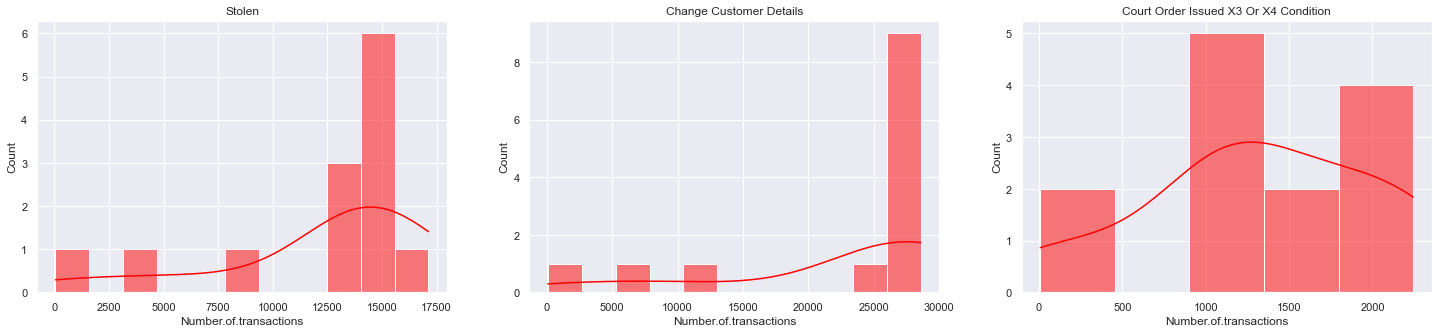

In [ ]:
#### Uniform Distribution and a Positive Skewed Distribution ####

# Set a grey background

sns.set(style="darkgrid")

# Set up figure

fig, axs = plt.subplots(1,3, figsize=(25,5))

# Draw graph

# Stolen
sns.histplot(data=df4[df4["Action.Reason"]=='Stolen'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[0]).set_title("Stolen")

# Change Customer Details
sns.histplot(data=df4[df4["Action.Reason"]=='Change Customer Details'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[1]).set_title("Change Customer Details")

# Court Order Issued X3 Or X4 Condition
sns.histplot(data=df4[df4["Action.Reason"]=='Court Order Issued X3 Or X4 Condition'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[2]).set_title("Court Order Issued X3 Or X4 Condition")

- The data of **Stolen** is clustered at 12500-15000 while the data of **Change Customer Details** is clustered at 25000-30000. Their common feature is that all values are low except where they are clustered which fits the uniform distribution feature.
- The index is high between 1000-1500 in **Court Order Issued X3 Or X4 Condition**

`Random`

Text(0.5, 1.0, 'Remove Gender From Smartcard')

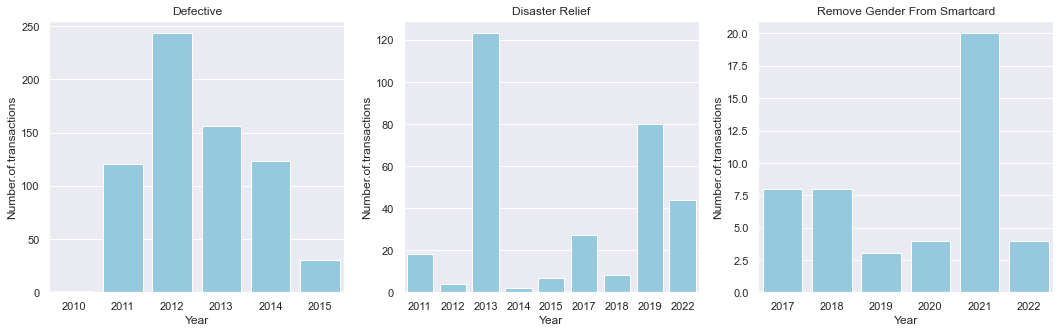

In [ ]:
#### Random ####

# Set a grey background

sns.set(style="darkgrid")

# Set up figure

fig, axs = plt.subplots(1,3, figsize=(18,5))

# Draw graph

# Defective
sns.barplot(data=df4[df4["Action.Reason"]=='Defective'],
            x="Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[0]).set_title("Defective")

# Disaster Relief
sns.barplot(data=df4[df4["Action.Reason"]=='Disaster Relief'],
            x="Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[1]).set_title("Disaster Relief")

# Remove Gender From Smartcard
sns.barplot(data=df4[df4["Action.Reason"]=='Remove Gender From Smartcard'],
            x="Year",
            y= 'Number.of.transactions',
            color="skyblue",
            ax=axs[2]).set_title("Remove Gender From Smartcard")


- _**All data in this category**_ are **random distribution**
    - This means these reasons are not random happen
    - E.g. Disaster Relief is random happen in random area
    - After 2015 the smart card replacement due to defective was disappear. This is a good thing for smart card service, this indicates that the smart card business is becoming more and more mature

##### Histogram analysis with barplot

Text(0.5, 1.0, 'Remove Gender From Smartcard')

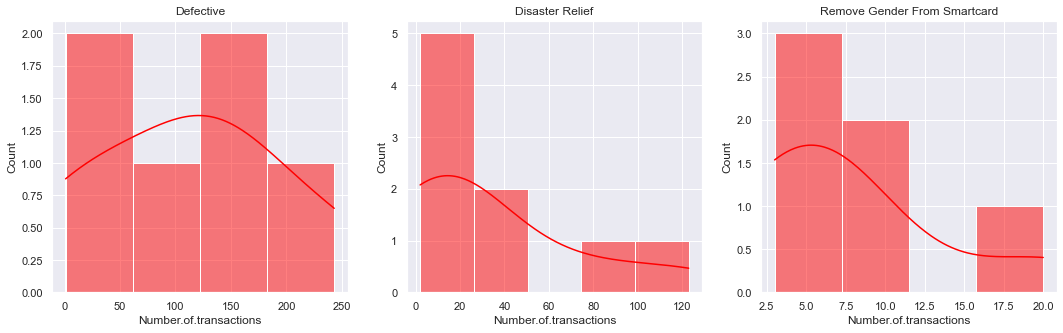

In [ ]:
#### Random ####

# Set a grey background

sns.set(style="darkgrid")

# Set up figure

fig, axs = plt.subplots(1,3, figsize=(18,5))

# Draw graph

# Defective
sns.histplot(data=df4[df4["Action.Reason"]=='Defective'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[0]).set_title("Defective")

# Disaster Relief
sns.histplot(data=df4[df4["Action.Reason"]=='Disaster Relief'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[1]).set_title("Disaster Relief")

# Remove Gender From Smartcard
sns.histplot(data=df4[df4["Action.Reason"]=='Remove Gender From Smartcard'],
            x= 'Number.of.transactions',
            color="red",
            kde = True,
            ax=axs[2]).set_title("Remove Gender From Smartcard")

- In the random group, the range of count is low, the count of **Defective** and **Remove Gender From Smartcard** is around 0 - 3, **Defective** has two peaks of 0-50 and 150
- The index around 0-20 often shows up in the **Disaster Relief dataset**

## Conclusion

- Stolen and Condition Change is going to be stay in high range of replacement reason index.
- Reasons of Change Customer Details, Lost, Lost in mail index may reach a higher place in the future.
- The total number of replacements may go higher in the future.
- The smart card quality is getting better
- Stolen, Change Customer Details, Lost, Condition Change, and Lost In Mail are the focus of the business objects because they all have more than 10,000 number of transactions.